<strong>Abstract</strong>  
In this notebook, various neural networks will be build to learn <strong>overfitting</strong> and <strong>regularization</strong>.

<strong>Reference</strong>  
See pages 104-118 of "<strong>Deep Learning with Python</strong>" by Francois Chollet (2018). 

<strong>Summary (page 118)</strong>  
Below are knacks for avoiding overfitting:
- Get more training data.
- Reduce the capacity of the network.
- Add weight regularization.
- Add dropout.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data preparation

In [13]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

print("train_data shape: {}".format(train_data.shape))
print("train_labels shape: {}".format(train_labels.shape))
print("test_data shape: {}".format(test_data.shape))
print("test_labels shape: {}".format(test_labels.shape))

print("the first 5 train_data: \n{}".format(train_data[:5]))
print("the first 5 train_labes: \n{}".format(train_labels[:5]))

train_data shape: (25000,)
train_labels shape: (25000,)
test_data shape: (25000,)
test_labels shape: (25000,)
the first 5 train_data: 
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 

In [14]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i , sequence in enumerate(sequences):
    results[i,sequence] = 1.
  
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("length of the first training data: ", len(x_train[0]))
print("length of the second training data: ", len(x_train[1]))
print("length of the third training data: ", len(x_train[2]))

print("length of the first test data: ", len(x_test[0]))
print("length of the second test data: ", len(x_test[1]))
print("length of the third test data: ", len(x_test[2]))

length of the first training data:  10000
length of the second training data:  10000
length of the third training data:  10000
length of the first test data:  10000
length of the second test data:  10000
length of the third test data:  10000


In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
x_val=x_train[:10000] # validation set
partial_x_train=x_train[10000:] # training set
y_val=y_train[:10000] # validation set
partial_y_train=y_train[10000:] # training set

## Model 1  
The number of nodes is 16.

In [42]:
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=40,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 3s 182us/step - loss: 0.5077 - acc: 0.7877 - val_loss: 0.3880 - val_acc: 0.8513
Epoch 2/40
15000/15000 [==============================] - 2s 130us/step - loss: 0.2915 - acc: 0.9045 - val_loss: 0.2962 - val_acc: 0.8868
Epoch 3/40
15000/15000 [==============================] - 2s 129us/step - loss: 0.2115 - acc: 0.9283 - val_loss: 0.2806 - val_acc: 0.8880
Epoch 4/40
15000/15000 [==============================] - 2s 132us/step - loss: 0.1664 - acc: 0.9443 - val_loss: 0.2969 - val_acc: 0.8802
Epoch 5/40
15000/15000 [==============================] - 2s 128us/step - loss: 0.1393 - acc: 0.9553 - val_loss: 0.2909 - val_acc: 0.8844
Epoch 6/40
15000/15000 [==============================] - 2s 129us/step - loss: 0.1149 - acc: 0.9653 - val_loss: 0.2970 - val_acc: 0.8837
Epoch 7/40
15000/15000 [==============================] - 2s 128us/step - loss: 0.0964 - acc: 0.9725 - val_loss: 0.3410 - 

## Model 2  
The number of nodes is 4.

In [36]:
model = models.Sequential()
model.add(layers.Dense(4,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history2 = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=40,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 154us/step - loss: 0.5179 - acc: 0.7811 - val_loss: 0.4139 - val_acc: 0.8515
Epoch 2/40
15000/15000 [==============================] - 2s 126us/step - loss: 0.3357 - acc: 0.8930 - val_loss: 0.3468 - val_acc: 0.8670
Epoch 3/40
15000/15000 [==============================] - 2s 128us/step - loss: 0.2557 - acc: 0.9191 - val_loss: 0.3009 - val_acc: 0.8827
Epoch 4/40
15000/15000 [==============================] - 2s 126us/step - loss: 0.2037 - acc: 0.9387 - val_loss: 0.2873 - val_acc: 0.8857
Epoch 5/40
15000/15000 [==============================] - 2s 125us/step - loss: 0.1708 - acc: 0.9485 - val_loss: 0.2802 - val_acc: 0.8868
Epoch 6/40
15000/15000 [==============================] - 2s 126us/step - loss: 0.1448 - acc: 0.9583 - val_loss: 0.2791 - val_acc: 0.8880
Epoch 7/40
15000/15000 [==============================] - 2s 125us/step - loss: 0.1252 - acc: 0.9644 - val_loss: 0.2875 - 

## Model 3  
The number of nodes is 512.

In [37]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history3 = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=40,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 9s 570us/step - loss: 0.5439 - acc: 0.7658 - val_loss: 0.3071 - val_acc: 0.8771
Epoch 2/40
15000/15000 [==============================] - 8s 524us/step - loss: 0.2611 - acc: 0.8985 - val_loss: 0.2726 - val_acc: 0.8892
Epoch 3/40
15000/15000 [==============================] - 8s 517us/step - loss: 0.1631 - acc: 0.9389 - val_loss: 0.2801 - val_acc: 0.8899
Epoch 4/40
15000/15000 [==============================] - 8s 519us/step - loss: 0.0676 - acc: 0.9767 - val_loss: 0.3543 - val_acc: 0.8902
Epoch 5/40
15000/15000 [==============================] - 8s 513us/step - loss: 0.1035 - acc: 0.9767 - val_loss: 0.3842 - val_acc: 0.8895
Epoch 6/40
15000/15000 [==============================] - 8s 514us/step - loss: 0.0038 - acc: 0.9996 - val_loss: 0.4977 - val_acc: 0.8890
Epoch 7/40
15000/15000 [==============================] - 8s 511us/step - loss: 4.2221e-04 - acc: 1.0000 - val_loss: 0.627

So far, 3 models with different numbers of nodes were trained. Let us compare results.  

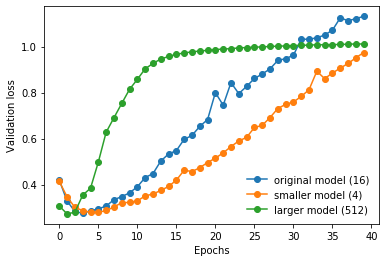

In [38]:
history_dict1=history.history
history_dict2=history2.history
history_dict3=history3.history

plt.plot(history_dict1['val_loss'], '-o', label = 'original model (16)')
plt.plot(history_dict2['val_loss'], '-o', label = 'smaller model (4)') 
plt.plot(history_dict3['val_loss'], '-o', label = 'larger model (512)') 
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend(frameon=False)
plt.show()

As you can see, the smaller neural network show overfitting later than the larger ones. The largest network starts overfitting after just few epochs. 

## Model 4  
The number of the nodes is 16. Here, the <strong>L2 weight regularization</strong> is added to avoid overfitting.


In [43]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                                     activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),
                                    activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history4 = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=40,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 165us/step - loss: 0.5537 - acc: 0.7846 - val_loss: 0.4270 - val_acc: 0.8755
Epoch 2/40
15000/15000 [==============================] - 2s 114us/step - loss: 0.3585 - acc: 0.8995 - val_loss: 0.3533 - val_acc: 0.8876
Epoch 3/40
15000/15000 [==============================] - 2s 114us/step - loss: 0.2864 - acc: 0.9213 - val_loss: 0.3330 - val_acc: 0.8889
Epoch 4/40
15000/15000 [==============================] - 2s 114us/step - loss: 0.2479 - acc: 0.9345 - val_loss: 0.3234 - val_acc: 0.8893
Epoch 5/40
15000/15000 [==============================] - 2s 114us/step - loss: 0.2268 - acc: 0.9425 - val_loss: 0.3326 - val_acc: 0.8878
Epoch 6/40
15000/15000 [==============================] - 2s 116us/step - loss: 0.2078 - acc: 0.9511 - val_loss: 0.3439 - val_acc: 0.8825
Epoch 7/40
15000/15000 [==============================] - 2s 112us/step - loss: 0.1973 - acc: 0.9529 - val_loss: 0.3399 - 

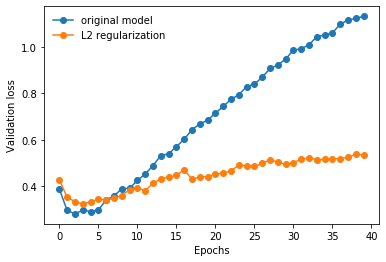

In [44]:
history_dict1=history.history
history_dict4=history4.history

plt.plot(history_dict1['val_loss'], '-o', label = 'original model')
plt.plot(history_dict4['val_loss'], '-o', label = 'L2 regularization') 
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend(frameon=False)
plt.show()

As you can see, the model trained with L2 regularization has less effect of overfitting. 

## Model 5
The number of the nodes is 16. Here, the <strong>L1 weight regularization</strong> is added to avoid overfitting.


In [47]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
                                     activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l1(0.001),
                                    activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history5 = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=40,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 3s 192us/step - loss: 1.0821 - acc: 0.7469 - val_loss: 0.7343 - val_acc: 0.7986
Epoch 2/40
15000/15000 [==============================] - 2s 130us/step - loss: 0.6643 - acc: 0.8403 - val_loss: 0.6350 - val_acc: 0.8570
Epoch 3/40
15000/15000 [==============================] - 2s 127us/step - loss: 0.6029 - acc: 0.8631 - val_loss: 0.5952 - val_acc: 0.8618
Epoch 4/40
15000/15000 [==============================] - 2s 128us/step - loss: 0.5732 - acc: 0.8681 - val_loss: 0.6253 - val_acc: 0.8281
Epoch 5/40
15000/15000 [==============================] - 2s 128us/step - loss: 0.5539 - acc: 0.8691 - val_loss: 0.5782 - val_acc: 0.8554
Epoch 6/40
15000/15000 [==============================] - 2s 128us/step - loss: 0.5410 - acc: 0.8722 - val_loss: 0.5638 - val_acc: 0.8612
Epoch 7/40
15000/15000 [==============================] - 2s 131us/step - loss: 0.5292 - acc: 0.8762 - val_loss: 0.5477 - 

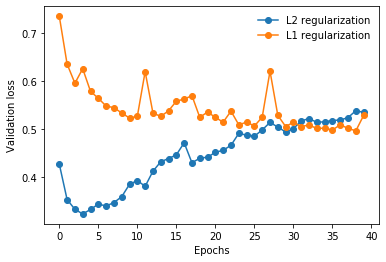

In [48]:
history_dict4=history4.history
history_dict5=history5.history

plt.plot(history_dict4['val_loss'], '-o', label = 'L2 regularization') 
plt.plot(history_dict5['val_loss'], '-o', label = 'L1 regularization')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend(frameon=False)
plt.show()

## Model 6
The number of the nodes is 16. Here, the <strong>L1 + L2 weight regularization</strong> is added to avoid overfitting.


In [49]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),
                                     activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),
                                    activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history6 = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=40,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 3s 192us/step - loss: 1.1074 - acc: 0.7279 - val_loss: 0.7276 - val_acc: 0.8392
Epoch 2/40
15000/15000 [==============================] - 2s 130us/step - loss: 0.6828 - acc: 0.8379 - val_loss: 0.6669 - val_acc: 0.8460
Epoch 3/40
15000/15000 [==============================] - 2s 129us/step - loss: 0.6319 - acc: 0.8524 - val_loss: 0.6284 - val_acc: 0.8533
Epoch 4/40
15000/15000 [==============================] - 2s 130us/step - loss: 0.6079 - acc: 0.8558 - val_loss: 0.6056 - val_acc: 0.8631
Epoch 5/40
15000/15000 [==============================] - 2s 131us/step - loss: 0.5870 - acc: 0.8626 - val_loss: 0.5900 - val_acc: 0.8608
Epoch 6/40
15000/15000 [==============================] - 2s 130us/step - loss: 0.5761 - acc: 0.8629 - val_loss: 0.5775 - val_acc: 0.8676
Epoch 7/40
15000/15000 [==============================] - 2s 131us/step - loss: 0.5630 - acc: 0.8683 - val_loss: 0.6364 - 

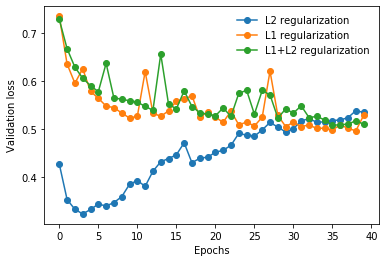

In [51]:
history_dict4=history4.history
history_dict5=history5.history
history_dict6=history6.history

plt.plot(history_dict4['val_loss'], '-o', label = 'L2 regularization') 
plt.plot(history_dict5['val_loss'], '-o', label = 'L1 regularization')
plt.plot(history_dict6['val_loss'], '-o', label = 'L1+L2 regularization')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend(frameon=False)
plt.show()

## Model 7  

Model with <strong>dropout</strong> layer (dropout rate = 0.5). The dropout rate is the fraction of the features that are zeroed out. This rate is typically set between 0.2 and 0.5.

In [53]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history7 = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=40,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 3s 209us/step - loss: 0.6256 - acc: 0.6461 - val_loss: 0.5185 - val_acc: 0.8524
Epoch 2/40
15000/15000 [==============================] - 2s 127us/step - loss: 0.5069 - acc: 0.7673 - val_loss: 0.3957 - val_acc: 0.8726
Epoch 3/40
15000/15000 [==============================] - 2s 126us/step - loss: 0.4264 - acc: 0.8207 - val_loss: 0.3322 - val_acc: 0.8829
Epoch 4/40
15000/15000 [==============================] - 2s 126us/step - loss: 0.3654 - acc: 0.8558 - val_loss: 0.2965 - val_acc: 0.8881
Epoch 5/40
15000/15000 [==============================] - 2s 125us/step - loss: 0.3159 - acc: 0.8815 - val_loss: 0.2782 - val_acc: 0.8859
Epoch 6/40
15000/15000 [==============================] - 2s 126us/step - loss: 0.2768 - acc: 0.8995 - val_loss: 0.2720 - val_acc: 0.8908
Epoch 7/40
15000/15000 [==============================] - 2s 128us/step - loss: 0.2486 - acc: 0.9153 - val_loss: 0.2726 - 

## Model 7  

Model with <strong>dropout</strong> layer (dropout rate = 0.3). The dropout rate is the fraction of the features that are zeroed out. This rate is typically set between 0.2 and 0.5.

In [59]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy']) 

history8 = model.fit(partial_x_train, 
                              partial_y_train,
                              epochs=40,
                              batch_size=512,
                              validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 3s 229us/step - loss: 0.5652 - acc: 0.7203 - val_loss: 0.4125 - val_acc: 0.8633
Epoch 2/40
15000/15000 [==============================] - 2s 124us/step - loss: 0.3926 - acc: 0.8553 - val_loss: 0.3235 - val_acc: 0.8860
Epoch 3/40
15000/15000 [==============================] - 2s 124us/step - loss: 0.3056 - acc: 0.8942 - val_loss: 0.2932 - val_acc: 0.8861
Epoch 4/40
15000/15000 [==============================] - 2s 126us/step - loss: 0.2487 - acc: 0.9163 - val_loss: 0.2784 - val_acc: 0.8891
Epoch 5/40
15000/15000 [==============================] - 2s 125us/step - loss: 0.2083 - acc: 0.9309 - val_loss: 0.2826 - val_acc: 0.8846
Epoch 6/40
15000/15000 [==============================] - 2s 125us/step - loss: 0.1720 - acc: 0.9442 - val_loss: 0.2831 - val_acc: 0.8888
Epoch 7/40
15000/15000 [==============================] - 2s 124us/step - loss: 0.1463 - acc: 0.9543 - val_loss: 0.3082 - 

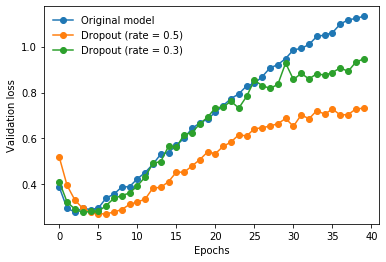

In [60]:
history_dict7=history7.history
history_dict8=history8.history

plt.plot(history_dict1['val_loss'], '-o', label = 'Original model') 
plt.plot(history_dict7['val_loss'], '-o', label = 'Dropout (rate = 0.5)')
plt.plot(history_dict8['val_loss'], '-o', label = 'Dropout (rate = 0.3)')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend(frameon=False)
plt.show()

As can be seen in the figure above, the effect of overfitting is supressed when the dropout layers with appropreate dropout rate are added to the neural network.